In [3]:
import pandas as pd

In [4]:
from pandas_datareader import data
import matplotlib.pyplot as plt
from matplotlib import style, cm
import numpy as np
style.use('ggplot')

In [5]:
start_date='2015-11-22'
end_date='2021-03-30'
RFR = 0 #risk free rate

In [6]:
#tickers = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'XLM-USD', 'DASH-USD', 'DOGE-USD']
tickers = ['BTC-USD', 'ETH-USD']

In [7]:
no_of_simulations=100000

In [9]:
returns = pd.DataFrame()
for ticker in tickers:
    values = data.DataReader(ticker, 'yahoo', start_date, end_date)
    values[ticker] = values['Adj Close'].pct_change()
    
    if returns.empty:
        returns = values[[ticker]]
    else:
        returns = returns.join(values[[ticker]], how = 'outer')

In [10]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []


In [11]:
for portfolio in range(no_of_simulations):
    #generate some random portfolio weights
    weights = np.random.random_sample(len(tickers))
    
    #normalize them by dividing each by their collective sum
    weights = weights / np.sum(weights)
    
    #round to 3 decimals
    weights = np.round(weights, 3)
    
    #store them to calculate useful stuff later on
    portfolio_weights.append(weights)
    
    #Calculate the annualized return as mean returns over a year in portfolio
    annualized_return = np.sum(returns.mean() * weights) * 365
    portfolio_returns.append(annualized_return)
    
    #Get the covariance matrix and calculate risk as std deviation
    matrix_covariance = returns.cov()*365
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
    portfolio_stdv = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_stdv) 
    
    #sharpe ratio
    sharpe_ratio = (annualized_return - RFR) / portfolio_stdv
    sharpe_ratios.append(sharpe_ratio)

In [12]:
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]

portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ["Return", "Risk", "Sharpe", "Weights"]
print (portfolios_df)


        Return      Risk   Sharpe         Weights
0      1.34197  0.746151  1.79853  [0.892, 0.108]
1      1.38659  0.747052  1.85609  [0.834, 0.166]
2        1.502  0.768565  1.95429  [0.684, 0.316]
3      1.47122  0.760191  1.93533  [0.724, 0.276]
4      1.89513   1.00852  1.87913  [0.173, 0.827]
...        ...       ...      ...             ...
99995  1.69279  0.858341  1.97217  [0.436, 0.564]
99996  1.55739  0.788204  1.97587  [0.612, 0.388]
99997  1.78127  0.918395  1.93954  [0.321, 0.679]
99998  1.74203  0.890552  1.95612  [0.372, 0.628]
99999  1.48584  0.763936  1.94498  [0.705, 0.295]

[100000 rows x 4 columns]


In [13]:
min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
max_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
max_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

In [14]:
print(tickers)
print("Lowest Risk: ", min_risk['Weights']*100)
print("Maximum Return : ", max_return['Weights']*100)
print("Maximum Sharpe: ", max_sharpe['Weights']*100)

['BTC-USD', 'ETH-USD']
Lowest Risk:  [87.5 12.5]
Maximum Return :  [  0. 100.]
Maximum Sharpe:  [53.7 46.3]


In [17]:
print(max_return)
print(max_sharpe)
print(min_risk)

Return        2.02823
Risk           1.1278
Sharpe        1.79839
Weights    [0.0, 1.0]
Name: 3838, dtype: object
Return            1.61509
Risk             0.814497
Sharpe            1.98293
Weights    [0.537, 0.463]
Name: 1093, dtype: object
Return            1.35505
Risk             0.745979
Sharpe            1.81647
Weights    [0.875, 0.125]
Name: 1377, dtype: object


print(min_risk)

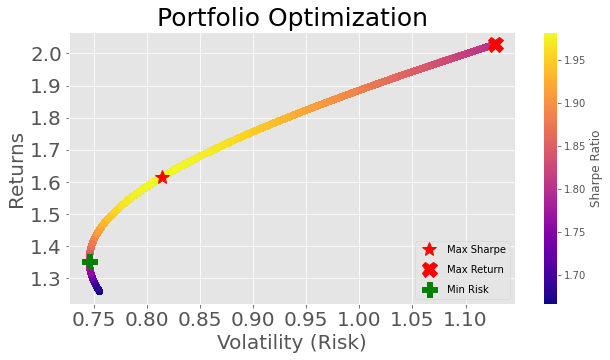

In [16]:
#Visualization

plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns / portfolio_risks, cmap=cm.plasma)
plt.title("Portfolio Optimization", fontsize = 25)
plt.xlabel("Volatility (Risk)", fontsize = 20)
plt.ylabel("Returns", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.colorbar(label = 'Sharpe Ratio')
plt.plot(max_sharpe['Risk'], max_sharpe['Return'], color = 'red', marker='*', label = 'Max Sharpe', linestyle='None', ms = 15)
plt.plot(max_return['Risk'], max_return['Return'], color = 'red', marker='X', linestyle='None', label = 'Max Return', ms = 15)
plt.plot(min_risk['Risk'], min_risk['Return'], color = 'red', marker='P', linestyle='None', label = 'Min Risk', ms = 15)
plt.legend(loc='upper left', labelspacing = 1)
plt.show()

In [10]:
type(btc_price)
#https://samueli.ucla.edu/ucla-blockchain-video-series/

pandas.core.frame.DataFrame